In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# correlation analysis

## Pearson's r

most commly used

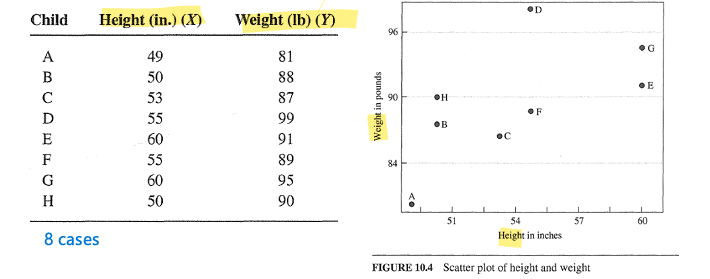

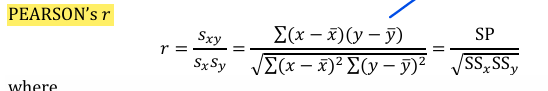

A 사례를 보면
x-x바 는 음수
y-y바도 음수니까 결국
둘이 곱한 분자는 양수가 된다   

F의 경우 둘이 곱하면 음수가 나옴

즉, 양수가 나오려면 둘 다 평균보다
위이거나 둘 다 평균보다 아래여야함
즉, 분자는 양수이거나 음수이다        

- SP가 양수이면 양의 상관관계 - x가 증가할 때 y가 증가하고 x가 감소할 때 y도 감소하니까
- SP가 음수이면 음의 상관관계 - x가 증가할 때 y는 감소하고 x가 감소할 때 y는 증가하니까              
- SP=이면 상관관계 또는 직선관계가 없음



In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset
hw=pd.read_csv('/content/drive/MyDrive/data analysis and coding/hw.csv')

# Calculate Pearson's r
presult = pearsonr(hw['height'], hw['weight'])

# Output the results
print(presult)

## Spearman's rho

### 서열척도에 쓰임

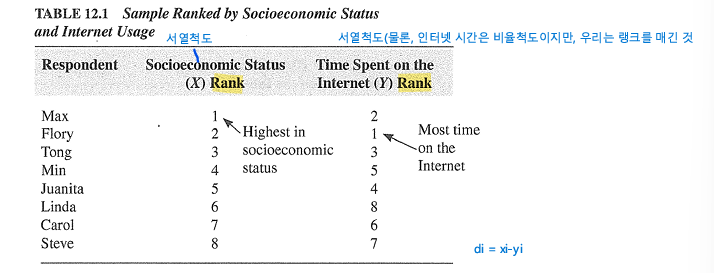

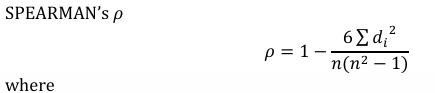

 만약 둘이 연관이 강하다면? di는 즉, xi빼기 yi는 작아질 것이다
둘이 완벽히 매치된다면? di는 0이 되는 것이다.                              
강한 상관관계일수록 di는 작아지겠지    

만약, 맥시범 레벨로 상관관계가 있다면 분자가 0이 된다.
이떄 로우는 1이 된는 것임

음수가 나오면 음의 상관관계      
1-(큰값) = 로우가 음수가 나온다. 그러므로 음수가 낭모녀 음의 상관관계가 나온다.
완전히 반대 순위인 경우를 가정하면 di가 매우 커지게 되기 때문에 di**2도 매우 커지고     
결국 1-(큰값)=음수 가 나온다.  

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Load the dataset
iuse=pd.read_csv('/content/drive/MyDrive/data analysis and coding/iuse.csv')

# Calculate Spearman's rho
cresult = spearmanr(iuse['ses'], iuse['itime'])

# Output the results
print(cresult)

### tied ranks

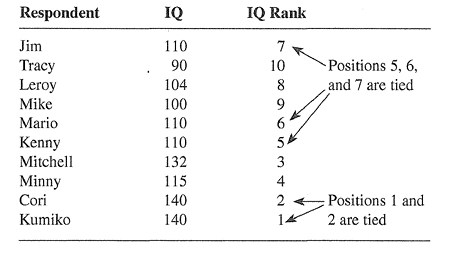
이 사례의 경우 x가 서열척도이고 y가 등간척도임. 이 경우 스피어만 로우를 사용해야 하마. 왜냐하면 두 변수 중 하나가
서열척도이기 떄문이다. 피어슨 r은 사용 불가능함(피어슨은 두 변수 모두 등간척도 또는 비율척도여야함)
이때는 등간 또는 비율척도 데이터를 순위로 변환 후 스피어만 상관계수를 계산한다.

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Load the dataset
iqs=pd.read_csv('/content/drive/MyDrive/data analysis and coding/iqs.csv')

# Calculate Spearman's rho
cresult_t = spearmanr(iqs['standing'], iqs['iqrt'])

# Output the results
print(cresult_t)

## Cramer's phi

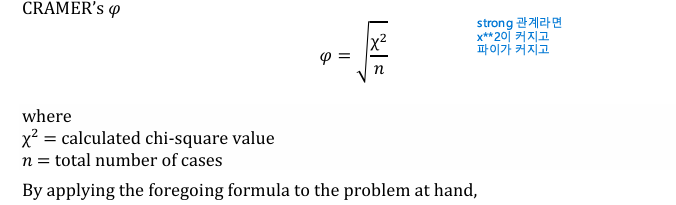

소주와 성별과의 연관성이 존재하긴 하지만 매우 약하다
크레이머 파이는 0~1의 값 가짐(지피티)
값이 클수록 명목척도 변수 간의 연관성이 강하디   
카이제곱 검정 결과 카이제곱 검정통계량은 유의하게 나올 수 있지만          
실제 연관성의 크기는 있긴 있지만 작을 수 있다!!!!  

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the dataset
soju = pd.read_csv('/content/drive/MyDrive/data analysis and coding/soju2.csv')

# Create a contingency table
contingency_table=pd.crosstab(soju['gender'].sort_values(ascending=True), soju['spreference'].sort_values(ascending=True))
contingency_table.columns=["Grapefruit", "Fresh"] # column label
contingency_table.index=["Male", "Female"] # row lable
print("Observed Frequencies:")
print(contingency_table,'\n')

# Calculate the chi-squared statistic, p-value, degrees of freedom, and expected frequencies
chi2, p, dof, expected = chi2_contingency(contingency_table, correction=False) # without Yates' continuity correction

# Use the length of the 'individual' column for the total number of cases (n)
n = len(soju['individual']) # number of cases
cramers_v = np.sqrt(chi2 / n )
print(chi2)
print(n)
print(cramers_v)